##IMPORT NECESSARY PYTHON LIBRARIES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



##READ IN THE FILES(CSV FILE)

In [8]:
pd.read_csv(r"C:\Users\ThatayotlheDinona\Downloads\Obesity Classification.csv")
df = pd.read_csv(r"C:\Users\ThatayotlheDinona\Downloads\Obesity Classification.csv")


EXPLORATORY ANALYSIS OF THE DATA

In [125]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


##CHECK FOR NULL VALUES AND DUPLICATES

In [79]:
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [81]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
103    False
104    False
105    False
106    False
107    False
Length: 108, dtype: bool

In [12]:
df.sample(10)


,ID,Age,Gender,Height,Weight,BMI,Label
63,66,41,Female,140,55,21.2,Normal Weight
61,64,31,Female,150,45,18.7,Underweight
38,41,17,Male,175,65,22.7,Normal Weight
94,97,17,Female,160,15,5.6,Underweight
70,73,25,Male,180,55,21.2,Normal Weight
65,68,51,Female,130,65,22.7,Normal Weight
39,42,22,Female,160,45,18.7,Underweight
96,99,27,Female,150,20,8.3,Underweight
88,91,38,Female,140,35,16.7,Underweight
31,33,29,Male,180,85,26.1,Overweight


In [227]:
df['Age'].describe()

count    108.000000
mean      46.555556
std       24.720620
min       11.000000
25%       27.000000
50%       42.500000
75%       59.250000
max      112.000000
Name: Age, dtype: float64

In [20]:
df.describe()


,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [24]:
df.shape

(108, 7)

In [26]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

##DATA MANIPULATION

In [30]:
df_group = df.groupby('Gender').count()
df_group

,ID,Age,Height,Weight,BMI,Label
Gender,,,,,,
Female,52,52,52,52,52,52
Male,56,56,56,56,56,56


##DATA VISUALISATION

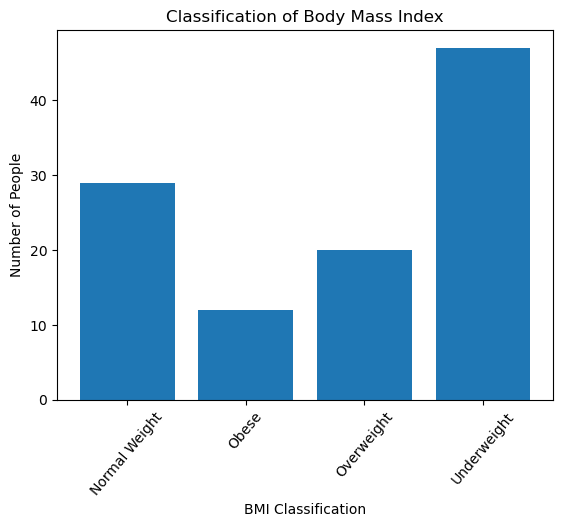

In [145]:
df_group = df.groupby('Label')['ID'].count().reset_index()

plt.bar(df_group[ 'Label'] ,df_group[ 'ID']) 
plt.xlabel('BMI Classification')
plt.ylabel('Number of People')
plt.title('Classification of Body Mass Index')
plt.xticks(rotation = 50)
plt.savefig('BMI Bar.png')
plt.show()


## DISTRIBUTION OF AGE

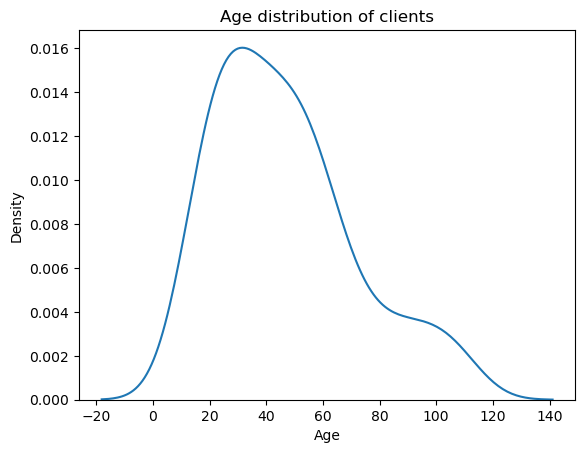

In [147]:
data = df['Age']

sns.kdeplot(data)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age distribution of clients')
plt.savefig('Age Distribution.png')
plt.show()

## BOXPLOT to visualise 1st, 2nd, third quartiles (boxplot helps to identify outliers)

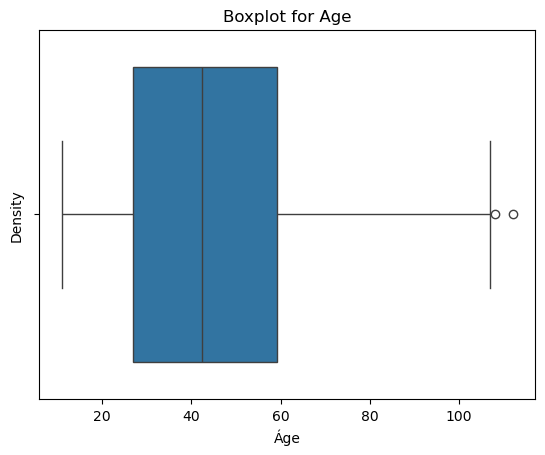

In [149]:
data = df['Age']

sns.boxplot(x= data)
plt.xlabel('Áge')
plt. ylabel('Density')
plt.title('Boxplot for Age')
plt.savefig('boxplot age bmi.png')
plt.show()

## RELATIONSHIP BETWEEN AGE & BMI Using Scatterplot

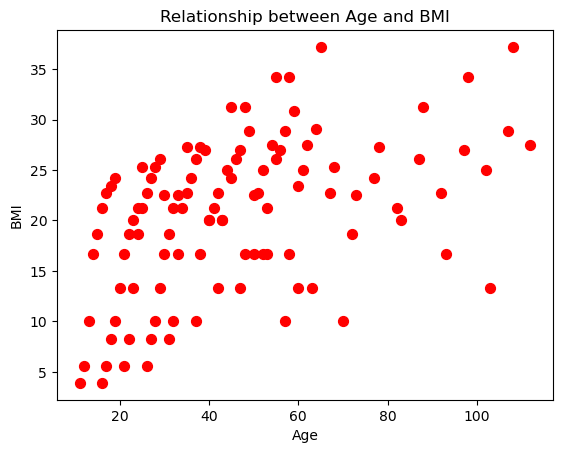

In [151]:
plt.scatter(df['Age'],df['BMI'],color='Red',s= 50)

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Relationship between Age and BMI')
plt.savefig('age and bmi.png')
plt.show()

## CORRELATION BETWEEN AGE AND BMI

In [119]:
correlation = df['Age'].corr(df['BMI'])
print(f'Correlation between age and BMI: {correlation}')


Correlation between age and BMI: 0.474185098221011


## OBESITY AND AGE (filtering only those who are obese)

In [77]:
df_query = df.query('Label == "Obese"')  
df_query

,ID,Age,Gender,Height,Weight,BMI,Label
4,5,45,Male,190,100,31.2,Obese
6,7,55,Male,200,110,34.2,Obese
8,9,65,Male,210,120,37.2,Obese
16,17,48,Male,200,100,31.2,Obese
18,20,58,Male,210,110,34.2,Obese
24,26,88,Male,190,100,31.2,Obese
26,28,98,Male,200,110,34.2,Obese
28,30,108,Male,210,120,37.2,Obese
34,37,49,Male,200,105,28.9,Obese
36,39,59,Male,210,115,30.8,Obese


##OVERWEGHT BETWEEN GENDERS

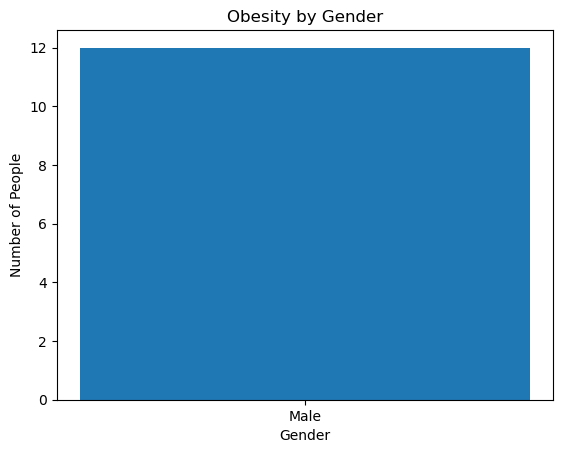

In [153]:
df_group = df_query.groupby('Gender')['Label'].count().reset_index()

plt.bar(df_group[ 'Gender'] ,df_group[ 'Label']) 
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Obesity by Gender')
plt.savefig('gender and obesity.png')
plt.show()


## OVERWEIGHT BY GENDER


In [135]:
df_query1 = df.query('Label== "Overweight"')
df_query1

,ID,Age,Gender,Height,Weight,BMI,Label
2,3,35,Male,180,90,27.3,Overweight
14,15,38,Male,190,90,27.3,Overweight
22,24,78,Male,180,90,27.3,Overweight
31,33,29,Male,180,85,26.1,Overweight
32,35,39,Male,190,95,27.0,Overweight
33,36,44,Female,140,75,25.0,Overweight
35,38,54,Female,130,85,27.5,Overweight
37,40,64,Female,120,95,29.1,Overweight
42,45,37,Male,190,85,26.1,Overweight
44,47,47,Male,200,95,27.0,Overweight


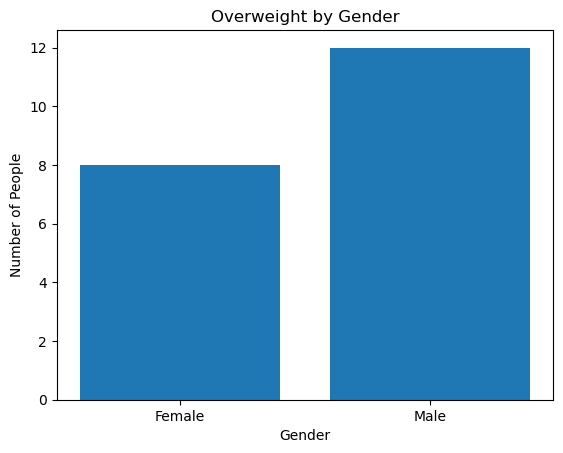

In [155]:
df_group = df_query1.groupby('Gender')['Label'].count().reset_index()

plt.bar(df_group[ 'Gender'] ,df_group[ 'Label']) 
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Overweight by Gender')
plt.savefig('gender and Overweight.png')
plt.show()


In [143]:
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


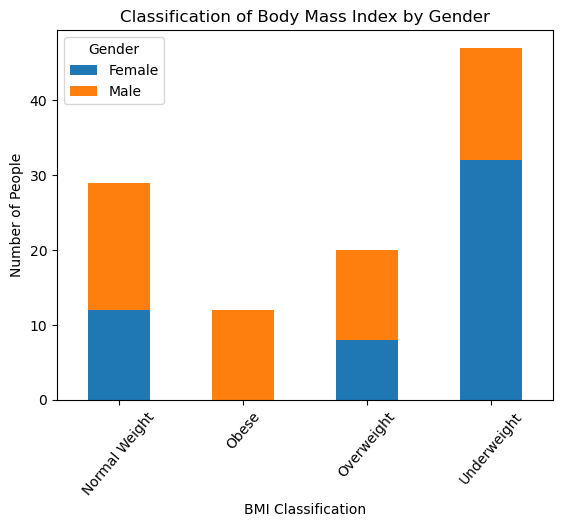

In [157]:
df_group = df.groupby(['Label', 'Gender'])['ID'].count().unstack(fill_value=0)


df_group.plot(kind='bar', stacked=True)
plt.xlabel('BMI Classification')
plt.ylabel('Number of People')
plt.title('Classification of Body Mass Index by Gender')
plt.xticks(rotation=50)
plt.legend(title='Gender')
plt.savefig('BMI_Stacked_Bar.png')  
plt.show()


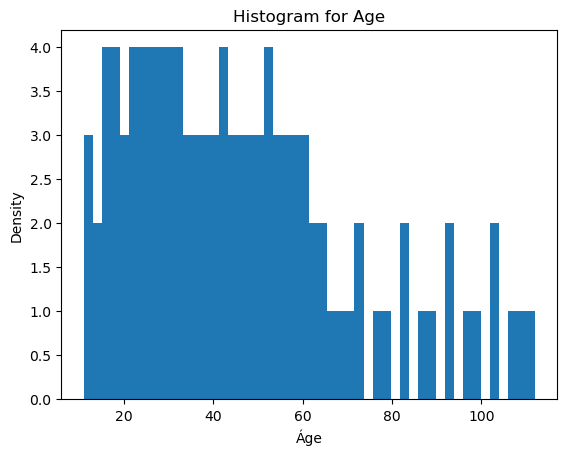

In [83]:
plt.hist(df['Age'], bins= 50)
plt.xlabel('Áge')
plt. ylabel('Density')
plt.title('Histogram for Age')
plt.savefig('boxplot age bmi.png')
plt.show()

In [181]:
df['Age'].describe()

count    108.000000
mean      46.555556
std       24.720620
min       11.000000
25%       27.000000
50%       42.500000
75%       59.250000
max      112.000000
Name: Age, dtype: float64

In [185]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [193]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
103    False
104    False
105    False
106    False
107    False
Length: 108, dtype: bool

In [195]:
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [207]:
df.rename(columns ={'Label': 'Classification'})

,ID,Age,Gender,Height,Weight,BMI,Classification
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [65]:
df['Gender'].value_counts()

Gender
Male      56
Female    52
Name: count, dtype: int64

In [57]:
df[['Age','BMI']].mean()

Age    46.555556
BMI    20.549074
dtype: float64

In [45]:
df[['Gender','Age']].groupby('Gender').mean()

,Age
Gender,
Female,48.903846
Male,44.375000


In [53]:
df.sort_values(by = 'Age').head()

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175,10,3.9,Underweight
93,96,12,Male,175,15,5.6,Underweight
83,86,13,Male,175,25,10.0,Underweight
78,81,14,Male,175,35,16.7,Underweight
68,71,15,Male,175,45,18.7,Underweight
